# WEF module: EODs, AMs, and Envelopes
version 01 Jun 2023

## Introduction
Freshwater weakly electric fish evolved independently in South & Central America (the Gymnotiformes) and in Africa (the Mormyroids), with more than 200 species currently identified in each clade. Gymnotiform and mormyroid fishes generate an electric field (electrogenesis) through a specialized electric organ (**EO**).
The electric organ discharges (**EODs**) are used in social communication and for sensing the animal's environment. The self-generated EOD is detected by an array of electroreceptors on the skin (electroreception). The fish actively senses distortions to their own EOD caused by nearby objects and the EODs of other fish.

![Figure1](Salazar_circuit.png)
Each species of weakly electric fish produces a weak (<100 mV/cm) electric field with a characteristic EOD waveform. 
These waveforms come in two broad classes, wave-type and pulse-type. Wave-type species produce continuous, nearly sinusoidal EODs that range in frequency from less than 100 Hz to more than 2000 Hz (Fig. 1A). Pulse-type species produce short duration pulses, on the order of a few milliseconds to less than 1 millisecond, with interpulse intervals that can range from 10 milliseconds to well over 100 milliseconds (Fig. 1B). 
The EOD waveform and frequency are controlled by an 'electromotor pathway' (Fig. 1C). Action potentials generated by the EO cells (electrocytes) are the fundamental building blocks of the EOD. The near-simultaneous action potentials of a thousand or more electrocytes determine EOD waveform characteristics that can be species, sex, and individually distinct. The EOD frequency (**EODf**) is controlled by the medullary pacemaker nucleus (**Pn**), the electrogenic motor command center. The Pn directs the activity of the spinal electromotor neurons, which innervate the electrocytes. The Pn receives inputs from the prepacemaker nuclei (**PPn**), which modulate EOD frequency.
In this NS&B module, we  focus  on the electrosensory pathway of wave-type species (Fig. 1C). This electrosensory pathway begins with specialized **tuberous electroreceptors** that sense spatiotemporal modulations of the fish’s own EOD and send this information via primary afferents (EAs) to the hindbrain electrosensory lateral line lobe (**ELL**). The ELL pyramidal neurons (P-Cells) project to the torus semicircularis (Ts), which then projects to the optic tectum (TeO). The ELL P-Cells also project to the nucleus praeeminentialis (**nP**), which in turn drives feedback to the ELL, either directly or indirectly via the eminentia granularis posterior (**EGp**). Although there are multiple pathways for electro-sensory-motor integration, the most direct pathway connects the TS to the PPn via the nucleus electrosensorius (**nE**).

## Electric communication signals

When weakly electric fish are in close proximity, their electric fields mix, which results in patterns of interference that can be perceived by each of the fish. Fish can extract information about conspecifics from the interference pattern, and often the fish will respond with specialized modulations of their own electric field (e.g., jamming avoidance response, chirps, gradual rises, etc.). Sometimes the patterns of interference will impair the fish's ability to locate objects in its environment such as prey. In these cases, the fish will shift their EOD frequency away from each other to avoid the interference, a behavior known as Jamming Avoidance Response (**JAR**). You will use the electrosensory stimuli described below mimic different behavioral conditions. 

### This is the point of this tutorial: What are the patterns of interference, and how do we compute and plot them?
* **Section A**: We make 2 sinewaves - **EOD signals for each fish** with a given difference in EOD frequencies (**df**, difference frequency).
* **Section B**: We add those sinewaves together - similar to **two stationary fish**. [dF is the difference in frequencies]
* **Section C**: We multiply a carrier wave (e.g. the EOD of one fish) by a sinewave at a dF to generate AMs.
* **Section D**: What happens when we have more than 2 fish? Sum-of-sine stimuli when we have several stationary fish.
* **Section E**: A computational way to simulate an infinite number of stationary fish via AMs.
* **Section F**: What happens when fish move relative to each other? They generate envelopes.

### A) Individual EODs
Change the frequencies of the individual fish signals (S1f and S2f) to see how the following signals interact.

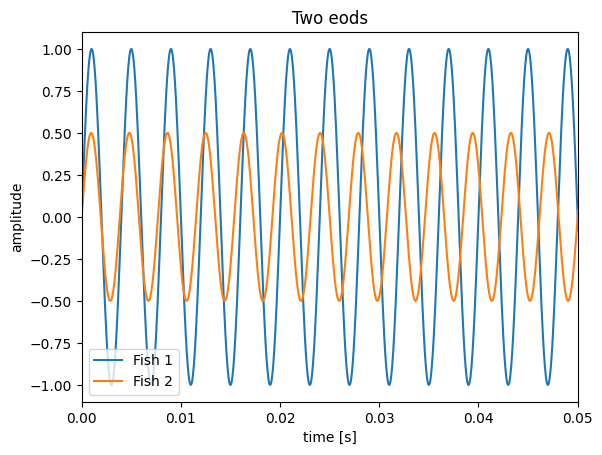

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fs = 20000 # sampling rate in Hz
duration = 2.0 # duration of simulation in seconds
time = np.arange(0.0, duration, 1./fs)

eodf1 = 250  # EOD frequency of first fish in Hz
a1 = 1.0  # EOD amplitude of first fish
eodf2 = 260  # EOD frequency of second fish in Hz
a2 = 0.5  # EOD amplitude of second fish, let it be smaller for now

eod1 = (np.sin(time * 2 * np.pi * eodf1) * a1)   # + (np.sin(time * 4 * np.pi * eodf1) * 0.5 * a1)
eod2 = (np.sin(time * 2 * np.pi * eodf2) * a2)   # + (np.sin(time * 4 * np.pi * eodf2 + np.pi) * 0.5 * a2)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(time, eod1, label="Fish 1")
ax.plot(time, eod2, label="Fish 2")
ax.set_title("Two eods")
ax.set_xlabel("time [s]")
ax.set_ylabel("amplitude")
ax.set_xlim([0, 0.05])
ax.legend()
plt.show()


### B) Two fish make 'Beats'
When two wave-type fish are close to one another (e.g., during courtship or agonistic situation), their electric fields sum. As happens whenever you add two sinewaves, the ampltiude will change as the two signals go in and out of phase with each other. This change in amplitude is known as an amplitude modulation (AM). In addition, there is a relative change in phase which is known as phase modulation (PM). The rate of the AMs and PMs is equal to the frequency difference between the two sinewaves. The frequency difference is commonly called the dF.

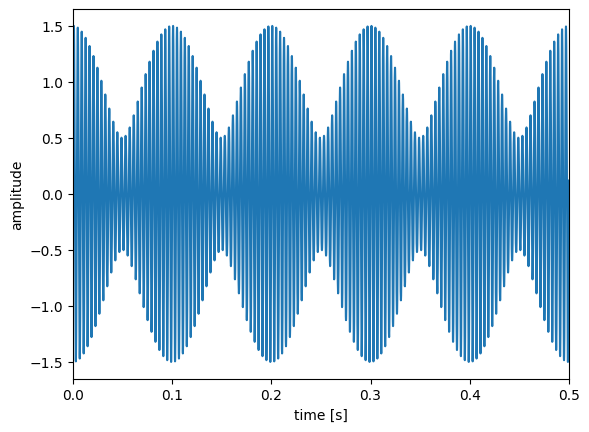

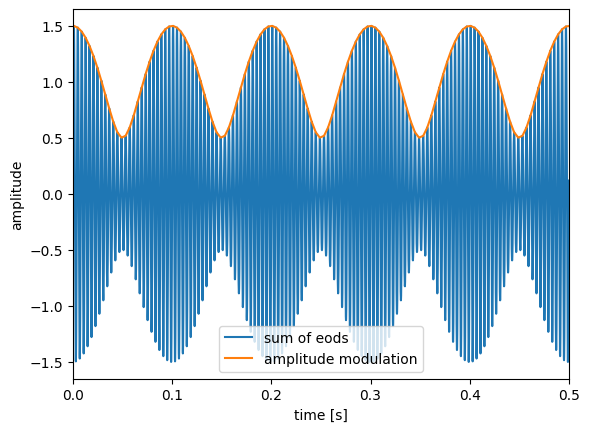

In [12]:
beating_signal = eod1 + eod2

# let's plot the beating signal
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, beating_signal)
ax.set_xlabel("time [s]")
ax.set_ylabel("amplitude")
ax.set_xlim([0, 0.5])
plt.show()

# let's extract the envelope [aka amplitude modulation (am) or Beat] by detecting the peak amplitudes
from scipy.signal import find_peaks
indices, _ = find_peaks(beating_signal)
am_time = time[indices]
am = beating_signal[indices]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, beating_signal, label="sum of eods")
ax.plot(am_time, am, label="amplitude modulation")
ax.set_xlabel("time [s]")
ax.set_ylabel("amplitude")
ax.set_xlim([0, 0.5])
ax.legend()
plt.show()

### C) Sinusoidal amplitude modulations (SAMs) are similar to beats
Sinusoidal amplitude modulations (SAM) are meant to mimic the AMs that emerge when two fish are near each other. Instead of adding two sinewaves, we can multiply a single sinewave with a modulatory signal, such as another sinewave. We can imitate the AMs (but not PMs) generated when two fish are near each other by multiplying one fish's EOD with a sinewave equal to the dF. situation where two wave-type fish are close to one another (e.g., during courtship or agonistic situation). As seen in the introductory lecture, each fish will experience a SAM of its own EOD (i.e., a beat). The beat frequency can range from a few Hz to 400 Hz. Each fish’s EOD frequency and the sum are illustrated by running the code below.  

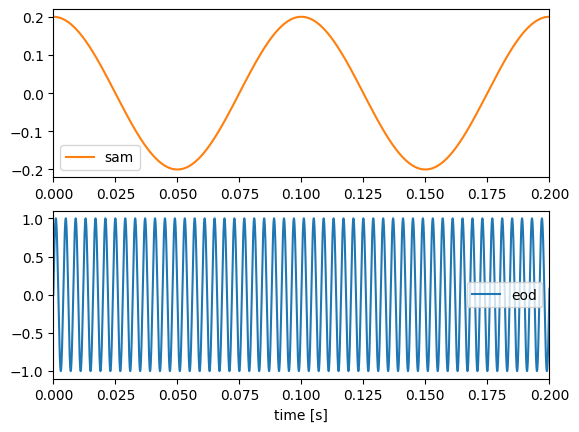

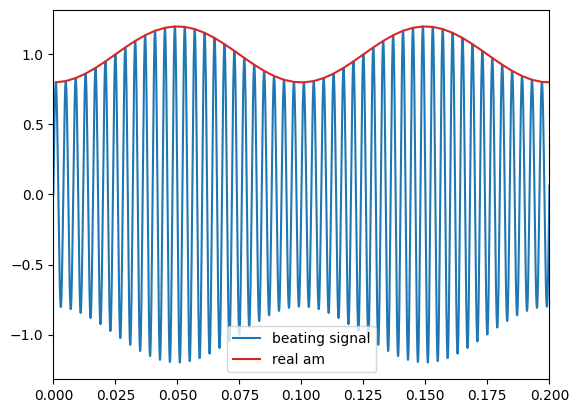

In [13]:
sam_freq = np.abs(eodf1 - eodf2)  # frequency of the desired amplitude modulation in Hz
sam_ampl = 0.2  # amplitude of the desired amplitude modulation

sam = np.cos(time * 2 * np.pi * sam_freq) * sam_ampl

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.plot(time, sam, label="sam", color="tab:orange")
ax1.set_xlim([0.0, 0.2])
ax2.plot(time, eod1, label="eod", color="tab:blue")
ax2.set_xlabel("time [s]")
ax2.set_xlim([0, 0.2])
ax1.legend()
ax2.legend()
plt.show()

eod2 = np.sin(2 * np.pi * time * eodf1 + np.pi)
# Let's apply the sam to the eod y = eod * (1 + sam)
beating_signal = eod1 + eod2 * sam
indices, _ = find_peaks(beating_signal)
real_am_time = time[indices]
real_am = beating_signal[indices]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, beating_signal, label="beating signal")
ax.plot(real_am_time, real_am, color="tab:red", label="real am")
ax.set_xlim([0, 0.2])
ax.legend()
plt.show()

### D) Sum of sines (more than two fish)
Now imagine that there are more than two fish. The interactions between the various sinewaves of the fish in the group can make for a complex, often seemingly unpredictable signal.
To simulate this situation, we can add the sinewaves of multiple fish at different EOD frequencies - as happens in nature. Or (as we've just learned) we can multiply S1 signal by an AM signal. In this case, the AM signal would be a sum of all the dFs between each of the fish in this artificial group. 
Sum of sines signals can be designed to appear random to the fish as long as they avoid integer common multiples in the dFs. Such a pseudorandom signal is composed of discrete frequencies that enables us to analyze the response with respect to each frequency independently.

(0.0, 0.2)

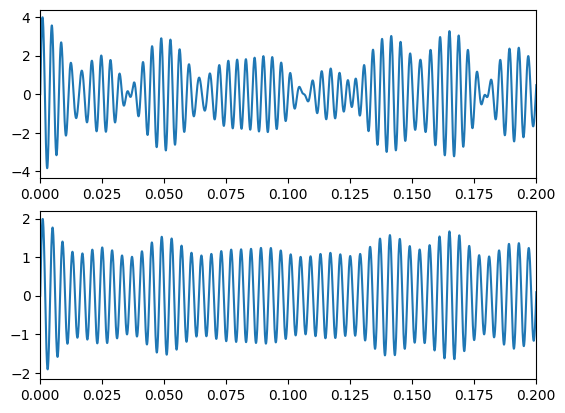

In [14]:
other_eodfs = sorted([255.55, 269.21, 292.03])  # A list of other fish frequencies
other_eodampls = np.ones_like(other_eodfs)  # A list of other fish frequencies

# METHOD 1: Combine the signals by adding each of the sinewaves together
eod_sum = eod1.copy()

# Add each of the other sinewaves to the fish's original sinewave
for eodf, eodampl in zip(other_eodfs, other_eodampls):
    eod_sum += np.sin(2 * np.pi * time * eodf) * eodampl

# Get the peaks so that we can visualize the amplitude modulation
indices, _ = find_peaks(eod_sum)  # One way to calculate amplitude envelope
am_time = time[indices]
am = eod_sum[indices]

# METHOD 2: Make the signal by multiplying by all of the difference frequencies
# CRITICALLY, we need to get the dFs between all of the other fish
import itertools
all_eodfs = [eodf1]
all_eodfs.extend(other_eodfs)

# we need to get all different dfs
combinations = itertools.combinations_with_replacement(all_eodfs, 2)
# we use itertools to get all possible combinations and use only those that are not 
all_dfs = np.array([np.diff(c) for c in combinations if np.diff(c) != 0.0])
all_dfs = all_dfs[all_dfs != 0]

multi = np.zeros_like(time)
for df in all_dfs:
    multi += (1 + np.cos(time * 2 * np.pi * df))

multi -= np.min(multi)
multi /= np.max(multi)

eod_mult = eod1 + eod1 * multi

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(time, eod_sum, color="tab:blue", label="summed signals")
# ax1.plot(am_time, am, color="tab:red", label="am")
ax1.set_xlim([0, 0.2])
ax2.plot(time, eod_mult)
ax2.set_xlim([0, 0.2])

### E) Random amplitude modulations (RAMs) 
RAMs are meant to mimic the situation where many (infinite number!) of fish are close to one another (e.g., a group of fish all in close proximity to one another). A random signal is a useful tool from a computational point of view.

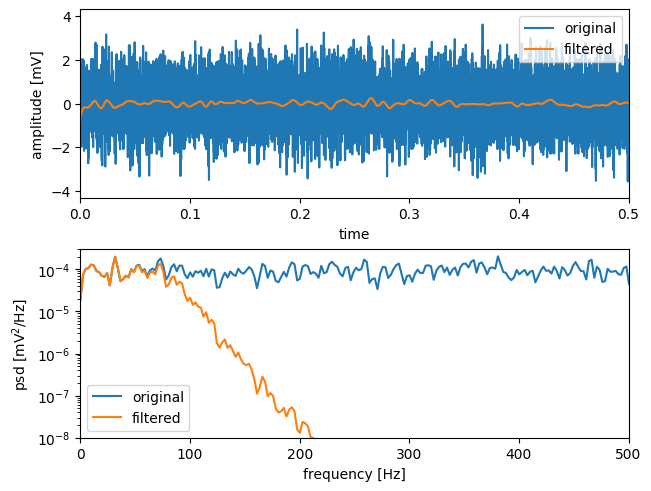

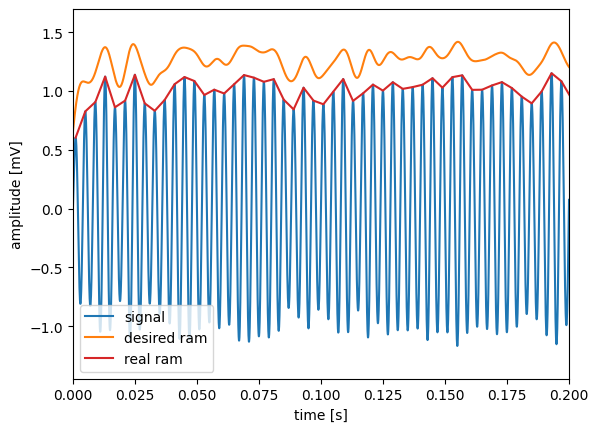

In [15]:
# We will generate a filtered noise AM modulated EOD signal.
# Generate noisy signal by drawing random numbers form a Gaussian (normal) distribution
ram = np.random.randn(len(time))

# The resulting signal has a "white" spectrum, let's low-pass filter the signal
cutoff = 100  # Low-Pass cutoff frequency in Hz
# We love butter
from scipy.signal import butter, filtfilt, welch
b, a = butter(3, cutoff, "low", fs=fs)
filtered_ram = filtfilt(b, a, ram)

f, p_ram = welch(ram, fs=fs, detrend="constant", window="hann", nperseg=2**13, noverlap=2**12)
f, p_filteredram = welch(filtered_ram, fs=fs, detrend="constant", window="hann", nperseg=2**13, noverlap=2**12)

fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(time, ram, label="original")
ax1.plot(time, filtered_ram, label="filtered")
ax1.set_xlabel("time")
ax1.set_ylabel("amplitude [mV]")
ax1.set_xlim(0, 0.5)
ax1.legend()

ax2.semilogy(f, p_ram, label="original")
ax2.semilogy(f, p_filteredram, label="filtered")
ax2.set_xlabel("frequency [Hz]")
ax2.set_ylabel("psd [mV$^2$/Hz]")
ax2.set_xlim(0, 500)
ax2.set_ylim(1e-8, 3e-4)
ax2.legend()
plt.show()


# apply the filtered ram stimulus to the eod
ram_signal = eod1 + eod1 * filtered_ram
indices, _ = find_peaks(ram_signal, rel_height=1.25)
am_time = time[indices]
am = ram_signal[indices]

# and plot it
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, ram_signal, label="signal")
ax.plot(time, 1.25 + filtered_ram, color="tab:orange", label="desired ram")
ax.plot(am_time, am, label="real ram", color="tab:red")
ax.set_xlim(0, 0.2)
ax.set_xlabel("time [s]")
ax.set_ylabel("amplitude [mV]")
ax.legend()


### F) Moving fish (envelopes!)
Fish routinely move, and this has an effect on the relative amplitude of the EOD perceived by the other fish. Like sound, as the source moves farther away, the amplitude decreases. For sound the decrease is roughly ^2 whereas for electricity in water it the decrease is roughly ^3.
We will simulate the second fish moving relative to the first fish.
The result is remarkable: the dF appears in the AM (red), and the movement frequency appears in the envelope of the AM (green).

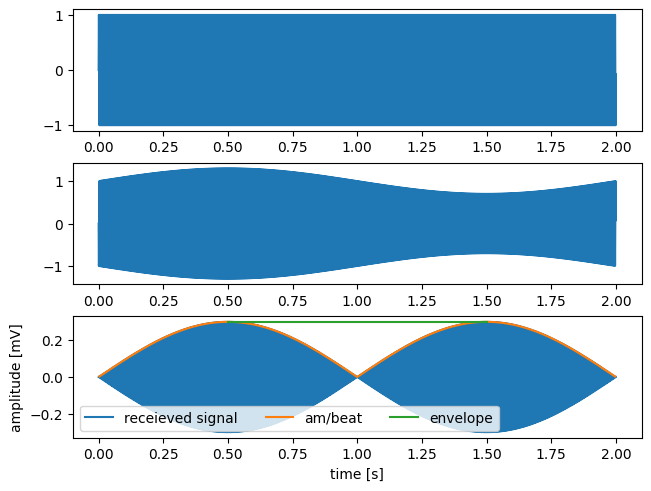

In [16]:
# windowidth = 2; % SET THIS FOR WIDTH OF PLOT in seconds 

# Movement frequency (envelope frequency) in Hz. [Default = 0.5]
env_freq = 0.5

# Make an AM modulation at that frequency. The +0.6 is attenuation due to distance 
am_distance = np.sin(time * 2 * np.pi * env_freq) * 0.3

# % AM modulate the S2 - this is similar to the S2 fish moving relative the the S1 fish    
moving_fish_eod = eod2 + eod2 * am_distance

# Add eod1 and eod2. This is what the fish 1 will receive.
fish1_signal = eod1 + moving_fish_eod

indices, _ = find_peaks(fish1_signal, rel_height=1.25)
am_time = time[indices]
am = fish1_signal[indices]

indices, _ = find_peaks(am)
env_time = am_time[indices]
env = am[indices]

fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(time, eod1)
ax2.plot(time, moving_fish_eod)
ax3.plot(time, fish1_signal, label="receieved signal")
ax3.plot(am_time, am, label="am/beat")
ax3.plot(env_time, env, label="envelope")
ax3.set_xlabel("time [s]")
ax3.set_ylabel("amplitude [mV]")
ax3.legend(ncols=3)

### G) Contrast modulated SAMs (simulated Envelopes)
As before, we can modulate the S1 by multiplication to simulate the natural envelopes. A simple way to mimic this is to give a SAM whose contrast varies dynamically in time. We’ll thus be giving a contrast modulated SAM. 
Again, multiplication has no effect on phase, only amplitude.


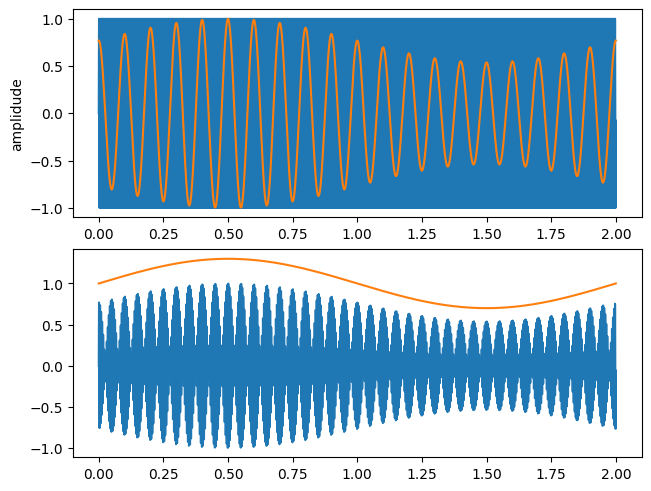

In [17]:

# % Take the AM signal from above 'sam'
# % multiply it by the movement frequency
contrast_modulation = np.sin(time * 2 * np.pi * sam_freq)
env = sam + sam * am_distance
env /= np.max(env)
sim_env = eod1 * env

indices, _ = find_peaks(sim_env)
fig = plt.figure(constrained_layout=True)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(time, eod1, label="EOD")
ax1.plot(time, env, label="contrast modulation")
ax1.set_ylabel("amplidude")
ax2.plot(time, sim_env, label="simulated envolpe")
#ax2.plot(am_time, am, label="sam")
ax2.plot(time, am_distance +1)


### Why (thrice)?

1) **Why all of these signals (EODs, AMs, Envelopes)?**
The fish respond to each of these signals, processing them simultaneously in sensory circuits. In other words - they are each biologically relevant!
2) **Why the two methods - adding and multiplying?**
We use these methods in different experimental circumstances for experimental control. For example, in Eigenmannia, the EOD is blocked and we replace it with an artificial S1 sinewave signal - for these fish we add signals. In contrast, in Apteronotus the EOD persists and we produce an amplitude-modulated signal that is time locked to the fish's own EOD. This is complicated to describe - easier to demonstrate in the experimental rig.
3) **Why Random signals?**
It is a 1) way to assess linearity (compare single sines to random sines) and 2) allows us to use a broader array of analytic techiques including spike triggered averaging (for example).